In [482]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [483]:
mydir = '/Users/supriyajadhav/Documents/MS422-Practical-Machine-Learning/Project422/'
processed_df = pd.read_csv(mydir + 'preprocessed_train_data.csv')

/var/folders/r1/dsylm7cn0vg3015hchpddz9m0000gn/T/ipykernel_72413/3622642928.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_df = pd.read_csv(mydir + 'preprocessed_train_data.csv')


In [484]:
processed_df[processed_df['sales'] != 0.0].head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,holiday_type,IS_HOLIDAY,oil_price,month,year,week_of_day,week_of_month,week_number
563,563,563,2013-01-01,25,BEAUTY,2.000,0,Salinas,Santa Elena,D,1,Holiday,1.0,93.14,1,2013,2,1,1
564,564,564,2013-01-01,25,BEVERAGES,810.000,0,Salinas,Santa Elena,D,1,Holiday,1.0,93.14,1,2013,2,1,1
566,566,566,2013-01-01,25,BREAD/BAKERY,180.589,0,Salinas,Santa Elena,D,1,Holiday,1.0,93.14,1,2013,2,1,1
568,568,568,2013-01-01,25,CLEANING,186.000,0,Salinas,Santa Elena,D,1,Holiday,1.0,93.14,1,2013,2,1,1
569,569,569,2013-01-01,25,DAIRY,143.000,0,Salinas,Santa Elena,D,1,Holiday,1.0,93.14,1,2013,2,1,1


In [485]:
processed_df['date'] = pd.to_datetime(processed_df['date'])
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008280 entries, 0 to 3008279
Data columns (total 19 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Unnamed: 0     int64         
 1   id             int64         
 2   date           datetime64[ns]
 3   store_nbr      int64         
 4   family         object        
 5   sales          float64       
 6   onpromotion    int64         
 7   city           object        
 8   state          object        
 9   type           object        
 10  cluster        int64         
 11  holiday_type   object        
 12  IS_HOLIDAY     float64       
 13  oil_price      float64       
 14  month          int64         
 15  year           int64         
 16  week_of_day    int64         
 17  week_of_month  int64         
 18  week_number    int64         
dtypes: datetime64[ns](1), float64(3), int64(10), object(5)
memory usage: 436.1+ MB


In [486]:
unique_store_family_df = processed_df[['store_nbr', 'family']].drop_duplicates()

# Reset index if you want a clean DataFrame
unique_store_family_df = unique_store_family_df.reset_index(drop=True)

# Display the resulting DataFrame
print(unique_store_family_df.head())
print(len(unique_store_family_df))

   store_nbr      family
0          1  AUTOMOTIVE
1          1   BABY CARE
2          1      BEAUTY
3          1   BEVERAGES
4          1       BOOKS
1782


In [487]:
missing_data = processed_df.isnull().sum()
print(missing_data)


Unnamed: 0             0
id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
city                   0
state                  0
type                   0
cluster                0
holiday_type     2746128
IS_HOLIDAY             0
oil_price         862752
month                  0
year                   0
week_of_day            0
week_of_month          0
week_number            0
dtype: int64


In [488]:
processed_df = processed_df.drop(columns=['holiday_type','oil_price'])

In [489]:
# Step 1: Group by 'store_nbr' and 'family'
grouped = processed_df.groupby(['store_nbr', 'family'])

# Step 2: Sort each group by 'date' in ascending order
sorted_df = grouped.apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# Optional: If you want to create a dictionary of DataFrames, one for each group
grouped_dict = {f"processed_{store}_{family}": group.sort_values('date') 
                for (store, family), group in grouped}

# Display the result
sorted_df.head()


,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,IS_HOLIDAY,month,year,week_of_day,week_of_month,week_number
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1.0,1,2013,2,1,1
1,1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,Quito,Pichincha,D,13,0.0,1,2013,3,1,1
2,3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,0.0,1,2013,4,1,1
3,5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,Quito,Pichincha,D,13,0.0,1,2013,5,1,1
4,7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,Quito,Pichincha,D,13,1.0,1,2013,6,1,1


In [490]:
processed_1_AUTOMOTIVE_df = grouped_dict['processed_1_BEVERAGES']

In [491]:
print(processed_1_AUTOMOTIVE_df.columns)

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'family', 'sales',
       'onpromotion', 'city', 'state', 'type', 'cluster', 'IS_HOLIDAY',
       'month', 'year', 'week_of_day', 'week_of_month', 'week_number'],
      dtype='object')


In [492]:
processed_1_AUTOMOTIVE_df.shape

(1688, 17)

In [493]:
# Extract date components
processed_1_AUTOMOTIVE_df['day'] = processed_1_AUTOMOTIVE_df['date'].dt.day

# Create cyclical features
processed_1_AUTOMOTIVE_df['month_sin'] = np.sin(2 * np.pi * processed_1_AUTOMOTIVE_df['month'] / 12)
processed_1_AUTOMOTIVE_df['month_cos'] = np.cos(2 * np.pi * processed_1_AUTOMOTIVE_df['month'] / 12)
processed_1_AUTOMOTIVE_df['weekday_sin'] = np.sin(2 * np.pi * processed_1_AUTOMOTIVE_df['week_of_day'] / 7)
processed_1_AUTOMOTIVE_df['weekday_cos'] = np.cos(2 * np.pi * processed_1_AUTOMOTIVE_df['week_of_day'] / 7)

# Optionally, create lag features and rolling statistics
# processed_1_AUTOMOTIVE_df['sales_lag_1'] = processed_1_AUTOMOTIVE_df['sales'].shift(1)
# processed_1_AUTOMOTIVE_df['sales_rolling_mean_7'] = processed_1_AUTOMOTIVE_df['sales'].rolling(window=7).mean()

# Drop rows with NaN values if needed
processed_1_AUTOMOTIVE_df = processed_1_AUTOMOTIVE_df.dropna()

In [494]:
processed_1_AUTOMOTIVE_df.shape

(1688, 22)

In [495]:
# drop unnecessary columns
processed_1_AUTOMOTIVE_df = processed_1_AUTOMOTIVE_df.drop([
    'Unnamed: 0',
    'date',
    'id',
    'city',
    'state',
    'store_nbr',
    'family',
    'type' ], 
    axis = 1)

In [496]:
print(processed_1_AUTOMOTIVE_df.columns)

Index(['sales', 'onpromotion', 'cluster', 'IS_HOLIDAY', 'month', 'year',
       'week_of_day', 'week_of_month', 'week_number', 'day', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos'],
      dtype='object')


In [497]:
processed_1_AUTOMOTIVE_df = processed_1_AUTOMOTIVE_df.astype('float64')
processed_1_AUTOMOTIVE_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 3 to 3006501
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales          1688 non-null   float64
 1   onpromotion    1688 non-null   float64
 2   cluster        1688 non-null   float64
 3   IS_HOLIDAY     1688 non-null   float64
 4   month          1688 non-null   float64
 5   year           1688 non-null   float64
 6   week_of_day    1688 non-null   float64
 7   week_of_month  1688 non-null   float64
 8   week_number    1688 non-null   float64
 9   day            1688 non-null   float64
 10  month_sin      1688 non-null   float64
 11  month_cos      1688 non-null   float64
 12  weekday_sin    1688 non-null   float64
 13  weekday_cos    1688 non-null   float64
dtypes: float64(14)
memory usage: 197.8 KB


In [498]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Selecting features
features = ['onpromotion', 'cluster', 'IS_HOLIDAY', 'month', 'year',
       'week_of_day', 'week_of_month', 'week_number', 'day', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos'
       #, 'sales_lag_1',
       #'sales_rolling_mean_7'
       ]
target = 'sales'

# Feature scaling
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Get the remaining records for the training set
X = processed_1_AUTOMOTIVE_df[features]
y = processed_1_AUTOMOTIVE_df[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.fit_transform(X_test)
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = target_scaler.fit_transform(y_test.values.reshape(-1,1))


In [499]:
print(X_train_scaled.shape)

(1350, 13)


In [500]:
print(y_train_scaled.shape)

(1350, 1)


In [501]:
print(X_test_scaled.shape)

(338, 13)


In [502]:
print(y_test_scaled.shape)

(338, 1)


## LSTM Model

In [503]:
import tensorflow as tf

def rmsle(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log(y_pred + 1) - tf.math.log(y_true + 1))))


In [504]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data to fit LSTM input shape (num_samples, timesteps, num_features)
timesteps = 1  # You need to define this based on your data and model requirements
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=60, return_sequences=True, input_shape=(timesteps, X_train_reshaped.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(units=60, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss=rmsle)
lstm_model.summary()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, 
               validation_data=(X_test_reshaped, y_test_scaled),
               callbacks=[early_stopping])


/Users/supriyajadhav/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                  │ (None, 1, 60)          │        17,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 1, 60)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 60)             │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,861 (183.05 KB)

 Trainable params: 46,861 (183.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1872 - val_loss: 0.1919
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0938 - val_loss: 0.1780
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0874 - val_loss: 0.1489
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0826 - val_loss: 0.1563
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0843 - val_loss: 0.1555
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0802 - val_loss: 0.1556


In [505]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_reshaped)

# Ensure both predictions and actual values are of type float64
y_test_scaled = y_test_scaled.reshape(-1, 1).astype('float64')
lstm_predictions_scaled = lstm_predictions.astype('float64')

# Calculate RMSLE
lstm_rmsle_val = rmsle(y_test_scaled, lstm_predictions_scaled)

print(f"LSTM RMSLE VAL: {lstm_rmsle_val.numpy()}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM RMSLE VAL: 0.15267204535583617


In [506]:
val_results_df = pd.DataFrame({
    'Actual': y_test_scaled.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_scaled.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_df.head())

     Actual  Predicted
0  0.210732   0.153138
1  0.598293   0.204625
2  0.473659   0.231439
3  0.485854   0.256295
4  0.430732   0.304109


In [507]:
lstm_predictions_scaled.shape

(338, 1)

In [508]:
y_test_scaled.shape

(338, 1)

In [509]:
y_test_actual = target_scaler.inverse_transform(y_test_scaled).astype('float64')
lstm_predictions_actual = target_scaler.inverse_transform(lstm_predictions_scaled).astype('float64')

In [510]:
val_results_actual_df = pd.DataFrame({
    'Actual': y_test_actual.flatten(),  # Flatten to ensure the shape is 1D
    'Predicted': lstm_predictions_actual.flatten()
})

# Display the first few rows of the DataFrame
print(val_results_actual_df.head())

   Actual    Predicted
0   864.0   627.867803
1  2453.0   838.962848
2  1942.0   948.901588
3  1992.0  1050.808871
4  1766.0  1246.846074


In [511]:
lstm_rmsle_val_actual = rmsle(y_test_actual, lstm_predictions_actual)
lstm_rmsle_val_actual

<tf.Tensor: shape=(), dtype=float64, numpy=0.6261133056835164>

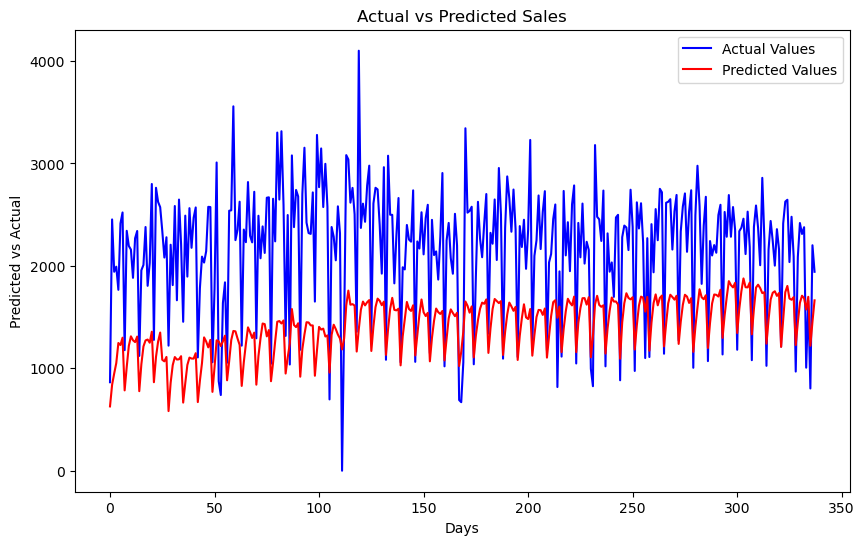

In [512]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='b')
plt.plot(lstm_predictions_actual, label='Predicted Values', color='r')
plt.xlabel('Days')
plt.ylabel('Predicted vs Actual')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


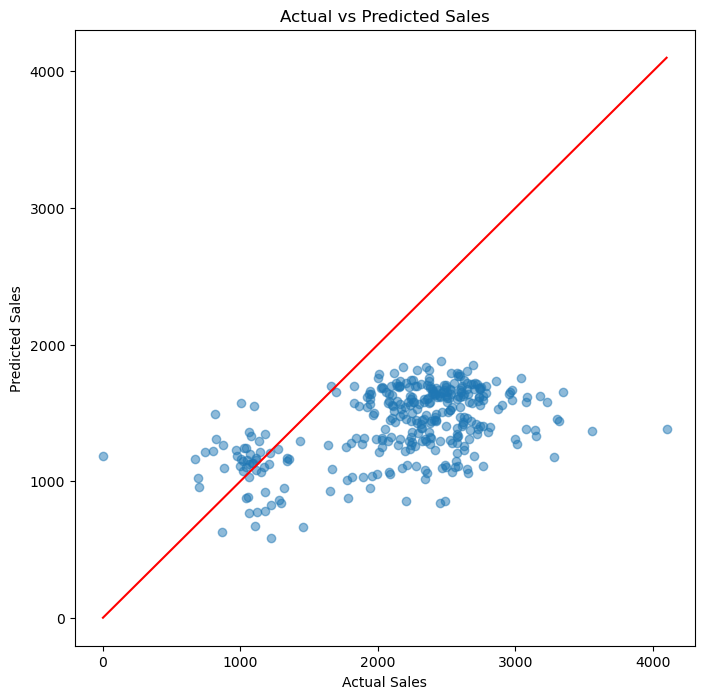

In [513]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, lstm_predictions_actual, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red')  # Diagonal line
plt.show()


## predcition on test.csv

In [514]:
predictions_list=[]

In [515]:
test_df = pd.read_csv(mydir + 'preprocessed_test_data.csv')
test_df.head()

,Unnamed: 0,id,date,store_nbr,family,onpromotion,city,state,type,cluster,IS_HOLIDAY,day,month,year,week_of_day,week_of_month,week_number
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
1,1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
2,2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
4,4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33


In [516]:
# Step 1: Group by 'store_nbr' and 'family'
grouped_test = test_df.groupby(['store_nbr', 'family'])

# Step 2: Sort each group by 'date' in ascending order
sorted_test_df = grouped_test.apply(lambda x: x.sort_values('date')).reset_index(drop=True)

# Optional: If you want to create a dictionary of DataFrames, one for each group
grouped_test_dict = {f"test_{store}_{family}": group.sort_values('date') 
                for (store, family), group in grouped_test}

# Display the result
sorted_test_df.head()


/var/folders/r1/dsylm7cn0vg3015hchpddz9m0000gn/T/ipykernel_72413/475314603.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sorted_test_df = grouped_test.apply(lambda x: x.sort_values('date')).reset_index(drop=True)


,Unnamed: 0,id,date,store_nbr,family,onpromotion,city,state,type,cluster,IS_HOLIDAY,day,month,year,week_of_day,week_of_month,week_number
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
1,1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
2,2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
4,4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33


In [517]:
test_1_AUTOMOTIVE_df = grouped_test_dict['test_1_BEVERAGES']
test_1_AUTOMOTIVE_df.head()

,Unnamed: 0,id,date,store_nbr,family,onpromotion,city,state,type,cluster,IS_HOLIDAY,day,month,year,week_of_day,week_of_month,week_number
3,3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,0.0,16,8,2017,3,3,33
1785,1785,3002673,2017-08-17,1,BEVERAGES,17,Quito,Pichincha,D,13,0.0,17,8,2017,4,3,33
3567,3567,3004455,2017-08-18,1,BEVERAGES,12,Quito,Pichincha,D,13,0.0,18,8,2017,5,3,33
5349,5349,3006237,2017-08-19,1,BEVERAGES,11,Quito,Pichincha,D,13,0.0,19,8,2017,6,3,33
7131,7131,3008019,2017-08-20,1,BEVERAGES,10,Quito,Pichincha,D,13,0.0,20,8,2017,0,3,33


In [518]:
test_1_AUTOMOTIVE_df.columns

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'family', 'onpromotion',
       'city', 'state', 'type', 'cluster', 'IS_HOLIDAY', 'day', 'month',
       'year', 'week_of_day', 'week_of_month', 'week_number'],
      dtype='object')

In [519]:
test_1_AUTOMOTIVE_df.shape

(16, 17)

In [520]:
# Create cyclical features
test_1_AUTOMOTIVE_df['month_sin'] = np.sin(2 * np.pi * test_1_AUTOMOTIVE_df['month'] / 12)
test_1_AUTOMOTIVE_df['month_cos'] = np.cos(2 * np.pi * test_1_AUTOMOTIVE_df['month'] / 12)
test_1_AUTOMOTIVE_df['weekday_sin'] = np.sin(2 * np.pi * test_1_AUTOMOTIVE_df['week_of_day'] / 7)
test_1_AUTOMOTIVE_df['weekday_cos'] = np.cos(2 * np.pi * test_1_AUTOMOTIVE_df['week_of_day'] / 7)

# Optionally, create lag features and rolling statistics
# processed_1_AUTOMOTIVE_df['sales_lag_1'] = processed_1_AUTOMOTIVE_df['sales'].shift(1)
# processed_1_AUTOMOTIVE_df['sales_rolling_mean_7'] = processed_1_AUTOMOTIVE_df['sales'].rolling(window=7).mean()

# Drop rows with NaN values if needed
test_1_AUTOMOTIVE_df = test_1_AUTOMOTIVE_df.dropna()

test_1_AUTOMOTIVE_df.shape

(16, 21)

In [521]:
test_1_AUTOMOTIVE_df_cp = test_1_AUTOMOTIVE_df.copy()

In [522]:
# drop unnecessary columns 
test_1_AUTOMOTIVE_df_cp = test_1_AUTOMOTIVE_df_cp.drop([
    'Unnamed: 0',
    'date',
    'id',
    'city',
    'state',
   'store_nbr',
     'family',
       'type' ], 
       axis = 1)

In [523]:
test_1_AUTOMOTIVE_df_cp.columns

Index(['onpromotion', 'cluster', 'IS_HOLIDAY', 'day', 'month', 'year',
       'week_of_day', 'week_of_month', 'week_number', 'month_sin', 'month_cos',
       'weekday_sin', 'weekday_cos'],
      dtype='object')

In [524]:
test_1_AUTOMOTIVE_df_cp_scaled = feature_scaler.fit_transform(test_1_AUTOMOTIVE_df_cp)

In [525]:
test_reshaped = test_1_AUTOMOTIVE_df_cp_scaled.reshape((test_1_AUTOMOTIVE_df_cp_scaled.shape[0], 
                                                               timesteps, 
                                                               test_1_AUTOMOTIVE_df_cp_scaled.shape[1]))

# Make predictions using the LSTM model
lstm_predictions_test_normalised = lstm_model.predict(test_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [526]:
lstm_predictions_test_normalised

array([[0.17455313],
       [0.15223806],
       [0.12154256],
       [0.11347122],
       [0.11399044],
       [0.1397964 ],
       [0.16342969],
       [0.23494433],
       [0.21616441],
       [0.21914795],
       [0.21135862],
       [0.18313171],
       [0.22940314],
       [0.27887827],
       [0.30003953],
       [0.27357614]], dtype=float32)

In [527]:
lstm_predictions_test_normalised_reshaped = lstm_predictions_test_normalised.astype('float64')
lstm_predictions_test_actual = target_scaler.inverse_transform(lstm_predictions_test_normalised_reshaped).astype('float64')

In [528]:
lstm_predictions_test_actual

array([[ 715.667817  ],
       [ 624.17602986],
       [ 498.3244881 ],
       [ 465.23202211],
       [ 467.36080796],
       [ 573.16526473],
       [ 670.06173879],
       [ 963.27174753],
       [ 886.27408147],
       [ 898.50659668],
       [ 866.57034904],
       [ 750.84000975],
       [ 940.55286646],
       [1143.40091348],
       [1230.16207218],
       [1121.66217566]])

In [531]:
predictions_df = pd.DataFrame({
        'id': test_1_AUTOMOTIVE_df['id'],
        'store_nbr': 1,
        'family': 'BEVERAGES',
        'date': test_1_AUTOMOTIVE_df['date'],  # Or any other identifier column you have
        'predictions': lstm_predictions_test_actual.flatten()  # Ensure predictions is 1D
    })

In [532]:
predictions_list.append(predictions_df)

print(predictions_df)

            id  store_nbr     family        date  predictions
3      3000891          1  BEVERAGES  2017-08-16   715.667817
1785   3002673          1  BEVERAGES  2017-08-17   624.176030
3567   3004455          1  BEVERAGES  2017-08-18   498.324488
5349   3006237          1  BEVERAGES  2017-08-19   465.232022
7131   3008019          1  BEVERAGES  2017-08-20   467.360808
8913   3009801          1  BEVERAGES  2017-08-21   573.165265
10695  3011583          1  BEVERAGES  2017-08-22   670.061739
12477  3013365          1  BEVERAGES  2017-08-23   963.271748
14259  3015147          1  BEVERAGES  2017-08-24   886.274081
16041  3016929          1  BEVERAGES  2017-08-25   898.506597
17823  3018711          1  BEVERAGES  2017-08-26   866.570349
19605  3020493          1  BEVERAGES  2017-08-27   750.840010
21387  3022275          1  BEVERAGES  2017-08-28   940.552866
23169  3024057          1  BEVERAGES  2017-08-29  1143.400913
24951  3025839          1  BEVERAGES  2017-08-30  1230.162072
26733  3